# **K-Vecinos más cercanos**

```
Alumno : Pfoccori Quispe Alex Harvey
Codigo: 193837
Proposito : K-NN en la clasificación de dureza
```

# **1. PASO PREVIO**

## Importacion de librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
# Librería: scikit learn, "sklearn"
# Módulo train_test_split: separación de datos para entrenamiento y test
from sklearn.model_selection import train_test_split
# Módulo KNeighborsClassifier: Implementa K-NN para clasificación
from sklearn.neighbors import KNeighborsClassifier
# Módulo classification_report: Métricas
from sklearn.metrics import classification_report
# Módulo accuracy_score: metrica de exactitud
from sklearn.metrics import accuracy_score
# Módulo confusion_matrix: matriz de confusión
from sklearn.metrics import confusion_matrix

## Importación de datos

In [2]:
datos = pd.read_csv("./dureza.csv", sep=',', header=0)
# muestras los primero 5 valores
datos.head()

,PC,PMg,PP,PS,Psi,Pti,PNb,PCr,PBr,Pal,PV,Pcu,PCl,Pni,Pmo,Pn,Dureza
0,0.243,1.27,0.015,0.0080,0.112,0.009,0.001,0.03,0.0004,0.039,0.003,0.03,0.0019,0.03,0.007,0.0058,293
1,0.231,1.26,0.015,0.0080,0.128,0.012,0.009,0.02,0.0005,0.028,0.003,0.01,0.0028,0.02,0.007,0.0035,293
2,0.220,1.26,0.017,0.0046,0.129,0.013,0.001,0.03,0.0004,0.044,0.004,0.03,0.0023,0.03,0.010,0.0048,293
3,0.230,1.26,0.014,0.0040,0.130,0.013,0.002,0.01,0.0003,0.027,0.001,0.01,0.0022,0.01,0.003,0.0064,293
4,0.232,1.26,0.012,0.0073,0.135,0.011,0.001,0.02,0.0005,0.045,0.003,0.02,0.0026,0.02,0.010,0.0065,293


## Información del dataset

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC      140 non-null    float64
 1   PMg     140 non-null    float64
 2   PP      140 non-null    float64
 3   PS      140 non-null    float64
 4   Psi     140 non-null    float64
 5   Pti     140 non-null    float64
 6   PNb     140 non-null    float64
 7   PCr     140 non-null    float64
 8   PBr     140 non-null    float64
 9   Pal     140 non-null    float64
 10  PV      140 non-null    float64
 11  Pcu     140 non-null    float64
 12  PCl     140 non-null    float64
 13  Pni     140 non-null    float64
 14  Pmo     140 non-null    float64
 15  Pn      140 non-null    float64
 16  Dureza  140 non-null    int64  
dtypes: float64(16), int64(1)
memory usage: 18.7 KB


In [5]:
# Revisar los datos unicos de dureza que existe
datos.Dureza.unique()

array([293, 302, 311, 321], dtype=int64)

In [6]:
# Contar datos valores para cada dureza
datos.Dureza.value_counts()

Dureza
311    45
293    36
321    31
302    28
Name: count, dtype: int64

## Distribución de clases

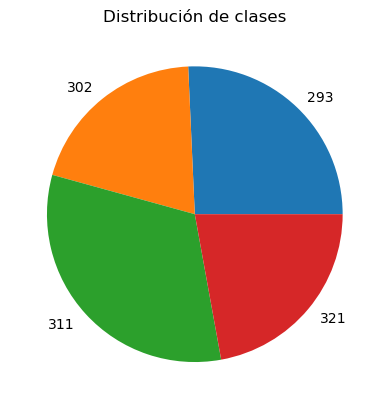

In [10]:
distribucion = datos.groupby('Dureza').size()
plt.pie(distribucion, labels = ['293','302', '311', '321'])
plt.title('Distribución de clases')
plt.show()

## **2. SEPARACIÓN DE DATOS PARA TRAINING Y TESTING**

In [40]:
# Sparación de datos en entrada y salida
X = datos.drop(['Dureza'], axis=1)
y = datos['Dureza']
# Sparación de datos para entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.30, random_state=13)

# **3. ENTRENAMIENTO Y TEST KNN**

In [41]:
# Definición del modelo
Modelo = KNeighborsClassifier(n_neighbors = 9)
# Entrenamiento del modelo
Modelo.fit(X_train, y_train)
# Test del modelo
Exactitud = Modelo.score(X_test, y_test)
print('Exactitud de K-NN, k=9, :', Exactitud)

Exactitud de K-NN, k=7, : 0.4523809523809524


## Matriz de confusión y exactitud

In [42]:
# Test del modelo
pred = Modelo.predict(X_test)
# Matriz de confusión
matriz = confusion_matrix(y_test, pred)
print(matriz)

[[3 1 5 2]
 [2 2 0 2]
 [2 1 6 7]
 [0 0 1 8]]


<Axes: >

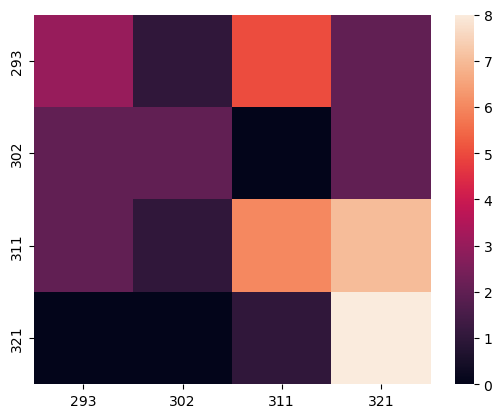

In [43]:
categorias = ['293','302', '311', '321']
sns.heatmap(matriz, yticklabels=categorias, xticklabels=categorias)

In [44]:
from sklearn.metrics import accuracy_score
# Calculo de acurracy (exactitud)
accuracy = accuracy_score(y_test, pred)
print('Exactitud: ',accuracy)

Exactitud:  0.4523809523809524


# **4. PREDICCIÓN DE NUEVOS CASOS**

In [49]:
nuevo = np.array([[0.25, 1.24, 0.017, 0.003, 0.14, 0.013, 0.002, 0.01, 0.0006, 0.027, 0.001, 0.01, 0.0022, 0.01, 0.003, 0.0064]])

In [50]:
y_pred = Modelo.predict(nuevo)
print(y_pred[0])

293


# Conclusión
Se entrenenó el dataset de dureza (dureza.csv), llengandose a una exactitud de 54.23% con los datos de semilla random_set = 13 y k = 9 (vecinos mas cercanos).
El porcentaje de 54.23% es muy bajo esto debido a la complejidad del dataset